# Uber Request data

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import data

In [2]:
uber_df =  pd.read_csv("Uber Request Data.csv")

### Show first 10 data

In [3]:
uber_df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
# Show diamention of the dataset
print("Shape:- ",uber_df.shape)

# Show the size of the dataset
print("Size:- ",uber_df.size)

Shape:-  (6745, 6)
Size:-  40470


### Description of Dataset

In [5]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
uber_df.count()

Request id           6745
Pickup point         6745
Driver id            4095
Status               6745
Request timestamp    6745
Drop timestamp       2831
dtype: int64

In [7]:
list(uber_df.columns)

['Request id',
 'Pickup point',
 'Driver id',
 'Status',
 'Request timestamp',
 'Drop timestamp']

### Check Missing Values

In [56]:
# Missing value is Present or not ?
uber_df.isnull().values.any()

True

In [9]:
# How many missing values are there ?
uber_df.isnull().values.sum()

6564

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


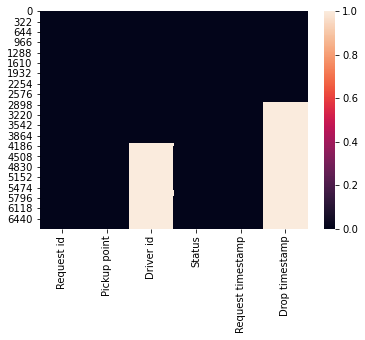

In [10]:
# Check which column have null values

sns.heatmap(uber_df.isnull())
print(uber_df.isnull().sum())

In [11]:
uber_df.shape[0]

6745

In [12]:
#percent % of missing values
(uber_df.isnull().sum()/uber_df.shape[0])*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

1. Driver ID contains 39.28% of missing values
2. Drop timestamp contains 58.02% of missing values

### Change all the date and time formate in one type

In [13]:
# Check formate of Request timestamp
uber_df['Request timestamp']

0           11/7/2016 11:51
1           11/7/2016 17:57
2            12/7/2016 9:17
3           12/7/2016 21:08
4       13-07-2016 08:33:16
               ...         
6740    15-07-2016 23:49:03
6741    15-07-2016 23:50:05
6742    15-07-2016 23:52:06
6743    15-07-2016 23:54:39
6744    15-07-2016 23:55:03
Name: Request timestamp, Length: 6745, dtype: object

In [14]:
# change all dates and time in one type
uber_df['Request timestamp'] = pd.to_datetime(uber_df['Request timestamp'],dayfirst=True)

In [15]:
# check new formate
uber_df['Request timestamp']

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [16]:
# Check formate of Drop timestamp

uber_df["Drop timestamp"]

0           11/7/2016 13:00
1           11/7/2016 18:47
2            12/7/2016 9:58
3           12/7/2016 22:03
4       13-07-2016 09:25:47
               ...         
6740                    NaN
6741                    NaN
6742                    NaN
6743                    NaN
6744                    NaN
Name: Drop timestamp, Length: 6745, dtype: object

In [17]:
# change all dates and time in one type
uber_df['Drop timestamp'] = pd.to_datetime(uber_df['Drop timestamp'], dayfirst= True)

In [18]:
uber_df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [19]:
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [20]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


### Check requested hours 

In [21]:
uber_df['Request timestamp'][4]

Timestamp('2016-07-13 08:33:16')

In [22]:
#print time 

print(uber_df['Request timestamp'][4].time())

08:33:16


In [23]:
# make new column of Requested Hours
uber_df["Requested hours"]= uber_df['Request timestamp'].dt.hour

In [24]:
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested hours
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23


In [25]:
# make new colunm of requested day
uber_df["Requested day"]= uber_df['Request timestamp'].dt.day

In [26]:
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested hours,Requested day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


### Types of values present.

In [27]:
uber_df.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
Requested hours        24
Requested day           5
dtype: int64

In [28]:
print('Unique Values for Requested Days: ', uber_df['Requested day'].unique())


Unique Values for Requested Days:  [11 12 13 14 15]


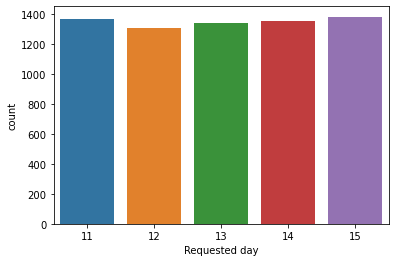

15    1381
11    1367
14    1353
13    1337
12    1307
Name: Requested day, dtype: int64


In [29]:
# Plot of values from Requested days
sns.countplot(x="Requested day",data=uber_df)
plt.show()
# check the unique values of Requested Days
print(uber_df["Requested day"].value_counts())

In [30]:
print('Unique Values for Status: ', uber_df['Status'].unique())

Unique Values for Status:  ['Trip Completed' 'Cancelled' 'No Cars Available']


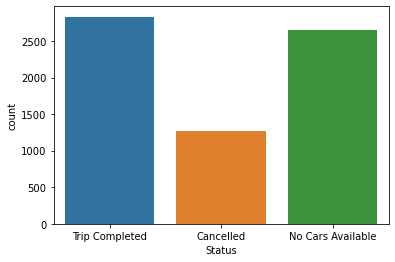

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64


In [31]:

# Plot of values from Status
sns.countplot(x="Status",data=uber_df)
plt.show()
# check the unique values of Status
print(uber_df["Status"].value_counts())

In [32]:
print('Unique Values for Pickup point	: ', uber_df['Pickup point'].unique())

Unique Values for Pickup point	:  ['Airport' 'City']


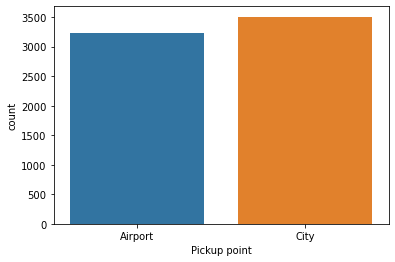

City       3507
Airport    3238
Name: Pickup point, dtype: int64


In [33]:

# Plot of values from Pickup point
sns.countplot(x="Pickup point",data=uber_df)
plt.show()
# check the unique values of Pickup point
print(uber_df["Pickup point"].value_counts())

### Analysis of data

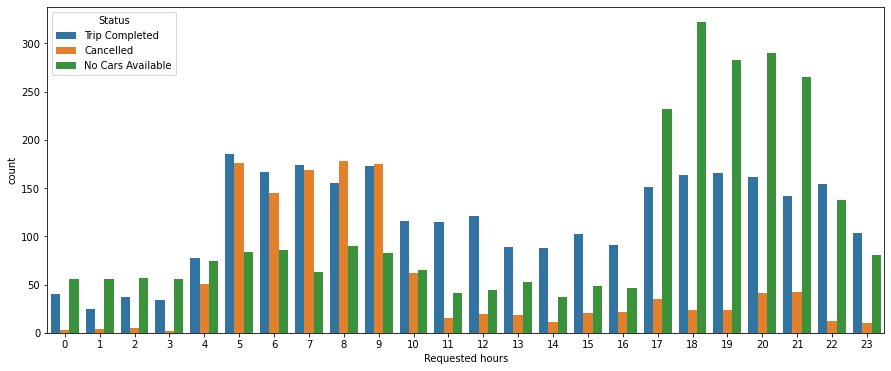

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(data=uber_df,x='Requested hours', hue='Status')
plt.show()

 From the above analysis, There should be more availability of cars during the night time

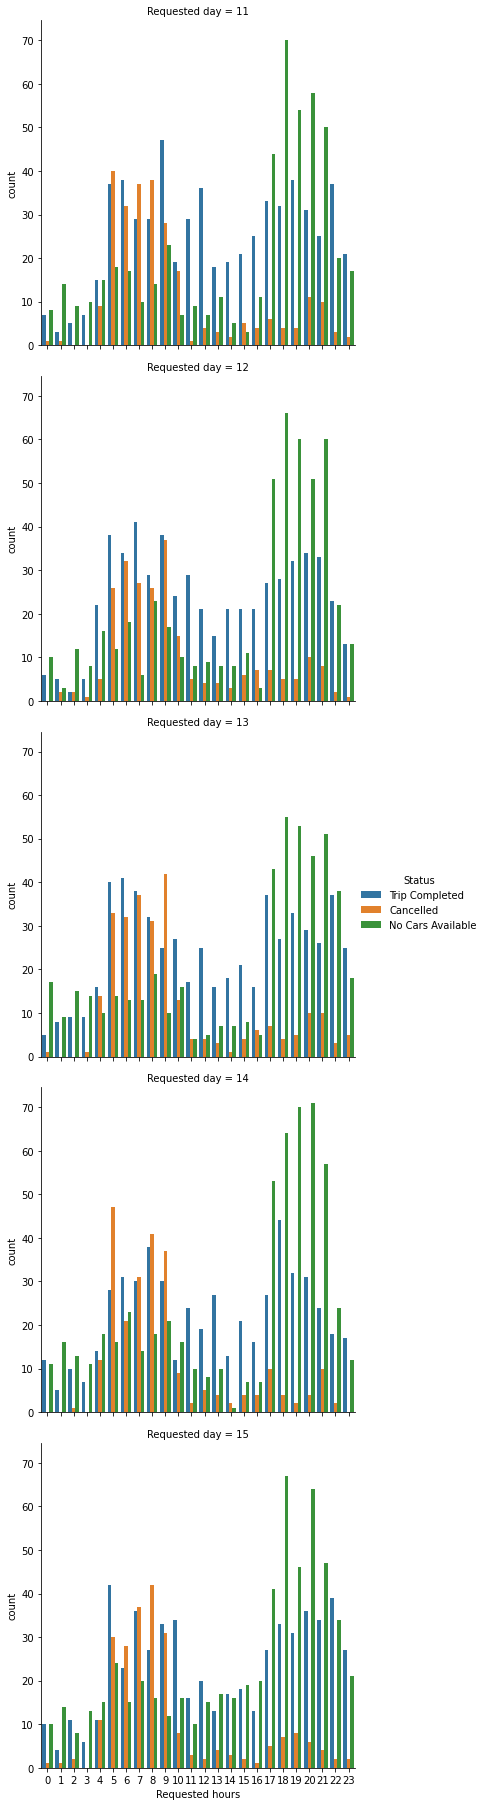

In [35]:
# check avilability of cars by day
sns.factorplot(data=uber_df, x="Requested hours", row="Requested day", hue="Status", kind="count")
plt.show()

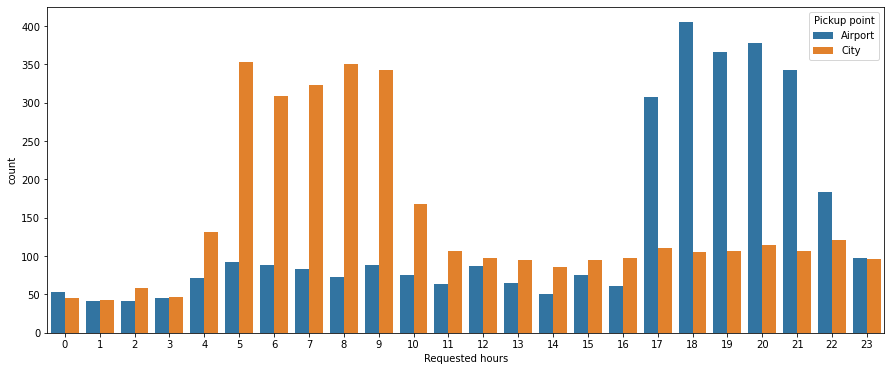

In [36]:
# check pickup points
plt.figure(figsize=(15,6))
sns.countplot(data=uber_df,x='Requested hours', hue='Pickup point')
plt.show()

#### Check time slot 

In [37]:
uber_df['Time Slot'] = 0
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested hours,Requested day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0


In [38]:
#put details about time slot

for x,y in enumerate(uber_df['Requested hours']):
    if y<5:
        uber_df['Time Slot'][x] = 'Pre_Morning'
    elif 5 <= y < 10:
        uber_df['Time Slot'][x] = "Morning_Rush"
    elif 10 <= y < 17:
        uber_df['Time Slot'][x] = "Day_Time"
    elif 17 <= y < 22:
        uber_df['Time Slot'][x] = "Evening_Rush"
    else:
        uber_df['Time Slot'][x] = "Late_Night"

In [39]:
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested hours,Requested day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


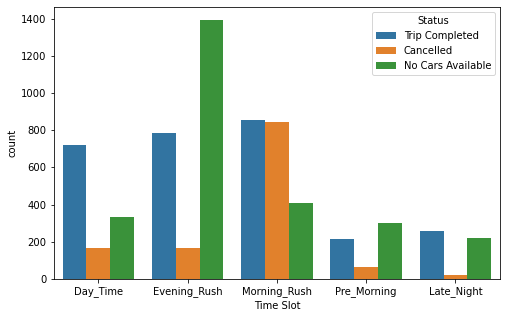

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time Slot, dtype: int64


In [40]:
# analysis of time slot
plt.figure(figsize=(8,5))
sns.countplot(data=uber_df, x='Time Slot', hue="Status")
plt.show()
print(uber_df['Time Slot'].value_counts())

#### Analysis of morning Rush

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

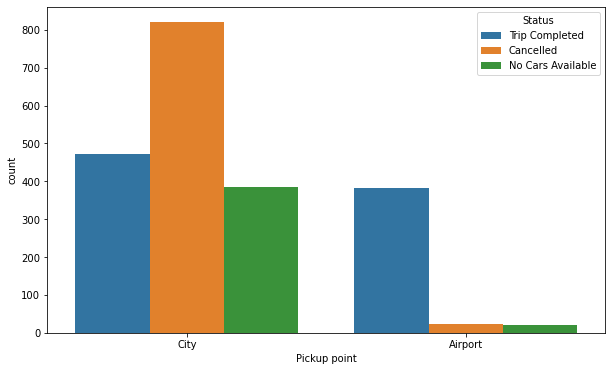

In [41]:
df_morning_rush = uber_df[uber_df['Time Slot']=='Morning_Rush']
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

In [42]:
# Check cancelled trips from airport
df_airport_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]
df_airport_cancelled.shape[0]

23

In [43]:
# Check cancelled trips from city
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & 
                                      (df_morning_rush["Status"]=="Cancelled")]
df_city_cancelled.shape[0]

820

In [44]:
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested hours,Requested day,Time Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


In [45]:
total_city_MR = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]
completed_city_MR = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

In [46]:
print('City Completion Rate: ', (completed_city_MR/total_city_MR)*100)

City Completion Rate:  28.14549791293977


In [47]:
total_airport_MR = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]
completed_airport_MR = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

In [48]:
print('Airport Completion Rate: ', (completed_airport_MR/total_airport_MR)*100)

Airport Completion Rate:  89.67136150234741


#### Analysis of Evening Rush

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

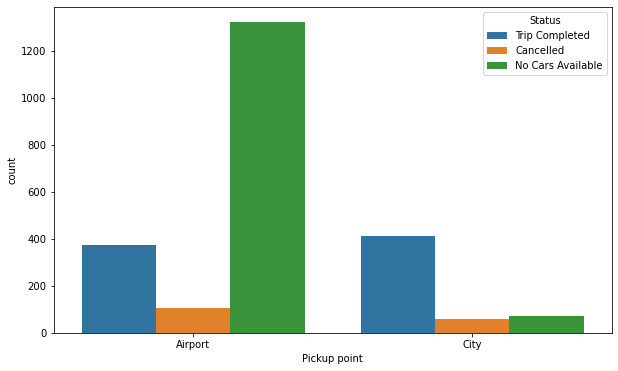

In [49]:
df_evening_rush=uber_df[uber_df['Time Slot']=='Evening_Rush']
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

In [50]:
# Check cancel Trips from city
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]
df_city_cancelled.shape[0]

60

In [51]:
# Check cancel Trips from airport
df_airport_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")]
df_airport_cancelled.shape[0]

106

In [52]:
total_city_ER = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]
completed_city_ER = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

In [53]:
print('City Completion rate: ', (completed_city_ER/total_city_ER)*100)

City Completion rate:  75.83025830258303


In [54]:
total_Airport_ER = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]
completed_Airport_ER = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

In [55]:
print('Airport Completion rate: ', (completed_Airport_ER/total_Airport_ER)*100)

Airport Completion rate:  20.72222222222222


## Summary
#### Problem Obsereved:-

 
1. In this project we analyze that requests made from airport to city and vice versa. All request is same with slightly more request at city to airport. 
2. About half of the rides are not completed due to cancelletion and unavailability of cars.
3. Most of the request is cancelled in Morning time 5.00 am to 10.00 am clock. Where city pickup point is more cancelled than airport.
4. Unavailablity of Cars is found more in evening time 17.00 to 22.00. Where in Airport unavilability of cars is more than city in evening time and Unavialbility of Cars in city is more in morning time.

#### Suggested Solutions:-

1. Special insentives can give to a driver who pickup passengers from airport in evening time and from city at morning time where unavilability of cars is more. 
2. To overcome the less request business can come with extra commission, bounuses, and different offers to passenger as well as drivers and encourage them to use rides by advertisement of offers. 